In [1]:
import numpy as np
import netCDF4 as NC
import matplotlib.pyplot as plt
import sisl
import hubbard

info:0: SislInfo: Please install tqdm (pip install tqdm) for better looking progress bars


In [6]:
H = hubbard.Hubbard('Systems/mol6.XV',t1=2.7,t2=0.0,t3=0.0)
#H = hubbard.Hubbard('Systems/mol6.XV',t1=2.7,t2=0.2,t3=0.18)

Found 112 pz sites
   U   = 0.0
   Nup = 56
   Ndn = 56
Appending to Systems/mol6.XV.nc


(0.0, -444.80086819768866)


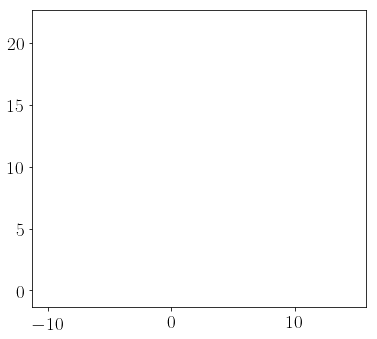

Wrote (U,Nup,Ndn)=(0.00,56,56) data to Systems/mol6.XV.nc
-0.2993134130953828 0.028538646948029527 -0.13538738307367662
0 0.09411528135220135
1 0.09411528135220135


In [8]:
H.U = 0
H.read()
for i in range(1):
    print H.iterate(mix=1)
H.plot_polarization(f=400)
H.save()
H.plot_localizations(ymax=0.12)

# Bandstructure

In [7]:
def readNC(fn,ispin=0,nbands=20):
    nc = NC.Dataset(fn)
    kx = nc.variables['grid'][:,0]
    ev = nc.variables['eigenvalues'][:,ispin,-nbands:]
    nc.close()
    return kx,ev

def mkplots(H):
    for xc in [r'LDA', r'GGA']:
        if 'LDA' in xc:
            fn = xc+'/31-ribbon/8.870/Ebands/Electrons.nc' # LDA minimum
        else:
            fn = xc+'/31-ribbon/8.970/Ebands/Electrons.nc' # GGA minimum
        fig = plt.figure(figsize=(4,8));
        axes = plt.axes();
        # Get TB bands
        ka, evup, evdn = H.get_1D_band_structure()
        ka = 2*ka # Units ka/pi
        egap = (evup[0,14]+evup[0,13])/2 # determine midgap
        # Add siesta bands
        k1, ev = readNC(fn)
        egap2 = (ev[0,9]+ev[0,10])/2
        plt.plot(ka,ev-egap2,'k');
        # Add TB results
        plt.plot(ka, evup-egap, 'r')
        # Adjust plot
        plt.ylim(-4,4)
        s = 19
        plt.rc('font', family='Bitstream Vera Serif', size=s)
        plt.rc('text', usetex=True)
        if H.t3 == 0:
            NN = '1NN'
        else:
            NN = '3NN'
        axes.set_title(r'%s vs.~%s ($U=%.2f$ eV)'%(xc,NN,H.U),size=s)
        axes.set_xlabel(r'$ka/\pi$')
        axes.set_ylabel(r'$E_{nk}$ (eV)')
        #plt.xticks(np.arange(0,.6,0.1))
        plt.subplots_adjust(left=0.2,top=.95,bottom=0.1,right=0.95)
        plt.savefig(xc+'-%s-U%.3i.pdf'%(NN,H.U*100))
        plt.close('all')

### (3,1)cGNR

In [8]:
H = hubbard.Hubbard('Systems/31cGNR.XV',t1=2.7,t2=0,t3=0,nsc=[3,1,1],kmesh=[100,1,1])
#H = hubbard.Hubbard('Systems/31cGNR.XV',t1=2.7,t2=0.2,t3=.18,nsc=[3,1,1],kmesh=[100,1,1])

Found 28 pz sites
   U   = 0.0
   Nup = 14
   Ndn = 14
Appending to Systems/31cGNR.XV.nc


(4.551914400963142e-15, -97.47038020045196)
Wrote (U,Nup,Ndn)=(2.00,14,14) data to Systems/31cGNR.XV.nc


/home/thf/.local/lib/python2.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


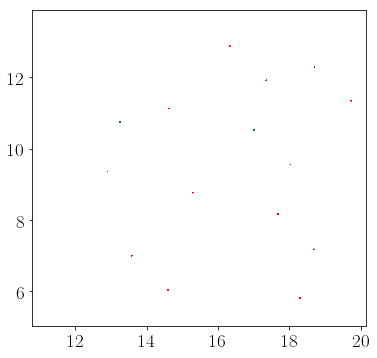

In [9]:
H.U = 2.
H.read()
for i in range(1):
    print H.iterate(mix=1)
#H.plot_charge(f=400)
H.save()
H.plot_polarization(f=400)
#mkplots(H)
H.plot_bands()

# mol1

Found 28 pz sites
   U   = 0.0
   Nup = 14
   Ndn = 14
Appending to Systems/mol1.XV.nc
Hash not found:
... t1=2.70 t2=0.00 t3=0.00 U=0.00 Nup=14.00 Ndn=14.00 
